In [158]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

#=========Importing models for classification efficiency
from sklearn.metrics import accuracy_score, classification_report

#===========Importing Classifier=========
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [106]:
#========Loading the dataset======
loan = pd.read_csv('data/loan.csv')

In [107]:
#==========Visualising the Dataset======
loan.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [108]:
len(loan)


614

In [109]:
#=======Checking the presence of Null Values=========

#==== We use built in Function isnull() and sum()

loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [110]:
#========filling null values in Column with Numerical Values============

#===========Loading the Required libray

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
loan_n = loan.iloc[:, 8:11]
dependat =loan['Dependents']
dependat = dependat.replace('3+', 3)
loan_n1 = loan.iloc[:, 3:4]
imputer.fit(loan_n)
loan_n = imputer.transform(loan_n)
loan_d = pd.DataFrame(loan_n)

In [111]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [112]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [113]:
loan['LoanAmount'],loan['Loan_Amount_Term'], loan['Credit_History'] = loan_d[0], loan_d[1], loan_d[2]


In [114]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [115]:
employ = loan['Self_Employed']
P_area = loan['Property_Area']
gender = loan["Gender"]
status = loan["Married"]
education = loan["Education"]
loan_status = loan['Loan_Status']


status = status.fillna("Yes")
gender = gender.fillna("Male")
P_area= P_area.fillna("Rural")
employ= employ.fillna("Yes")
dependat = dependat.fillna(1)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

#========Initializing String to be Encoded==========

input_class = ["Male", "Female"]
input_class1 = ["Yes", "No"]
input_class2 = ["Rural", "Urban", "Semiurban"]
input_class3 = ["Graduate", "Not Graduate"]
input_class4 = ["Y", "N"]

label_encoder.fit(input_class)


gender = gender.iloc[:].values
gender = list(gender)
gender = label_encoder.transform(gender)

label_encoder.fit(input_class1)

status = status.iloc[:].values
employ = employ.iloc[:].values
employ = list(employ)
status = list(status)
status = label_encoder.transform(status)
employ = label_encoder.transform(employ)


label_encoder.fit(input_class2)

P_area = P_area.iloc[:].values
P_area = list(P_area)
P_area = label_encoder.transform(P_area)

label_encoder.fit(input_class3)

education = education.iloc[:].values
education = list(education)
education = label_encoder.transform(education)

label_encoder.fit(input_class4)

loan_status = loan_status.iloc[:].values
loan_status =list(loan_status)
loan_status = label_encoder.transform(loan_status)

In [116]:
loan['Education'],loan['Self_Employed'],loan['Property_Area'],loan["Gender"],loan["Married"], loan['Loan_Status'], loan['Dependents'] =education, employ, P_area, gender, status, loan_status, dependat

In [117]:
loan.head()
loan.to_csv("Loan Processed data.csv")

In [118]:
data = loan.iloc[:, 1:-1]
target = loan.iloc[:, -1:]

In [119]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [120]:
target.head(2)

,Loan_Status
0,1
1,0


In [121]:
data.to_csv("Data.csv")
target.to_csv("Target.csv")

In [122]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 1/5, random_state=10)


In [123]:
model_a = RandomForestClassifier()
model_a.fit(x_train, y_train)
pred = model_a.predict(x_test)
forest = accuracy_score(y_test, pred)



from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
k = accuracy_score(y_test, pred)


from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)
MB= accuracy_score(y_test, pred)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)
GB=accuracy_score(y_test, pred)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
LR=accuracy_score(y_test, pred)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
DTC=  accuracy_score(y_test, pred)

print ("""The result were as Follows\nRandom Forest Classifer {}\n\n K Nearest Neighbors {}
\n\nMultinomial NB {}\n\nGaussian NB {}\n\nLogistic Regression {}\n\n Decision Tree Classifier {}
""".format(forest,k, MB, GB, LR, DTC))

The result were as Follows
Random Forest Classifer 0.7723577235772358

 K Nearest Neighbors 0.6097560975609756


Multinomial NB 0.5365853658536586

Gaussian NB 0.7804878048780488

Logistic Regression 0.7967479674796748

 Decision Tree Classifier 0.7154471544715447



In [124]:
loan.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [125]:
loan['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [126]:
# Normalize can be set to True to print proportions instead of number
loan['Loan_Status'].value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

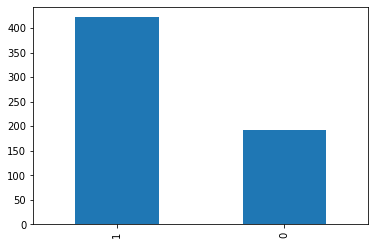

In [127]:
loan['Loan_Status'].value_counts().plot.bar()

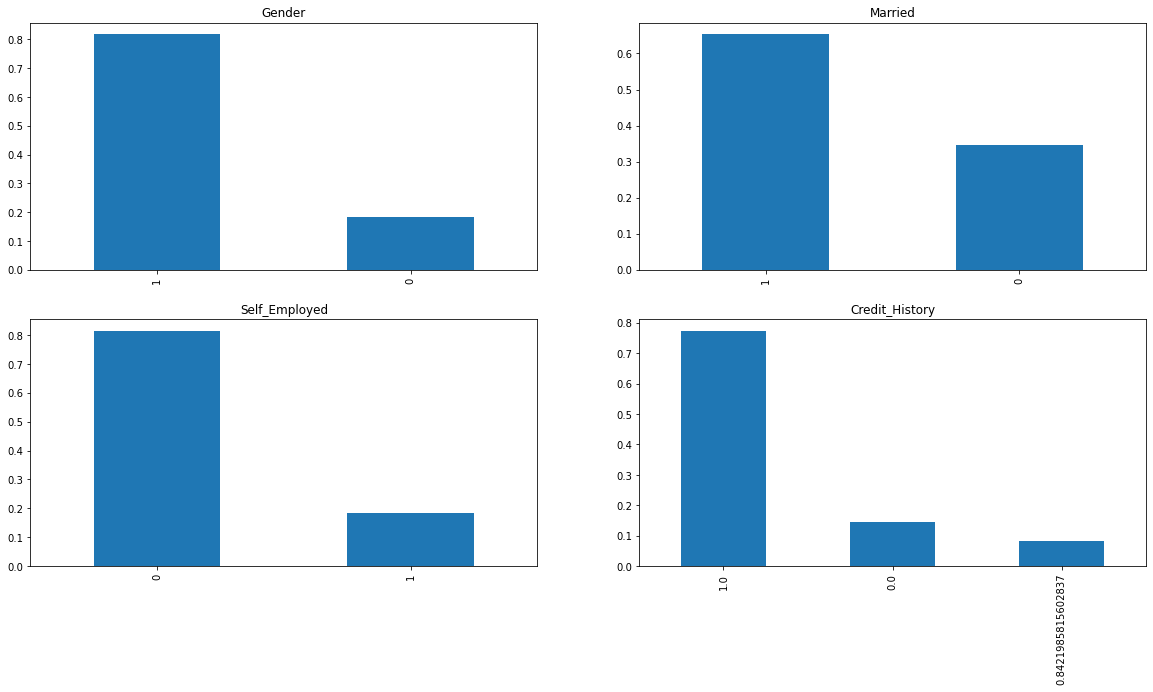

In [128]:
plt.figure(1) 
plt.subplot(221) 
loan['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
loan['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
loan['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
loan['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

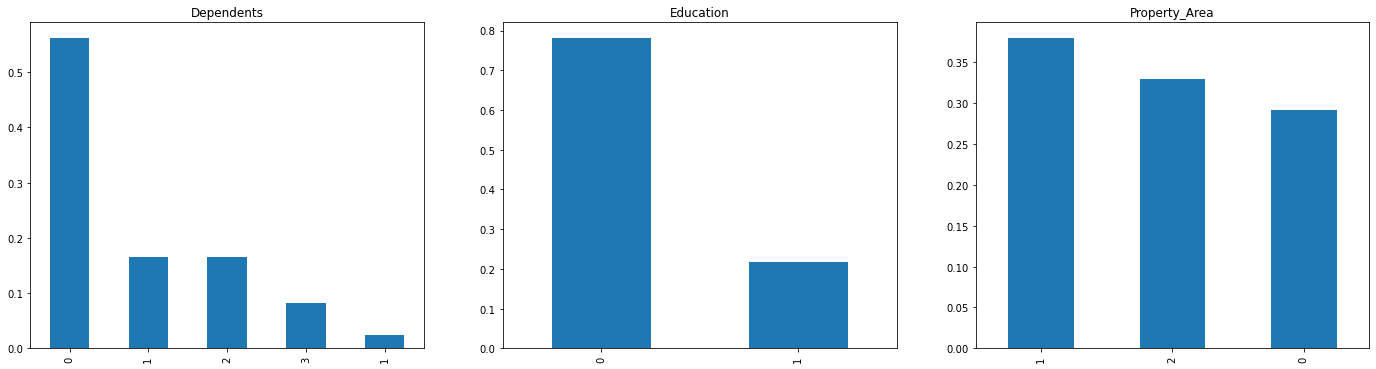

In [129]:
plt.figure(1) 
plt.subplot(131)
loan['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents') 
plt.subplot(132)
loan['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
loan['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()


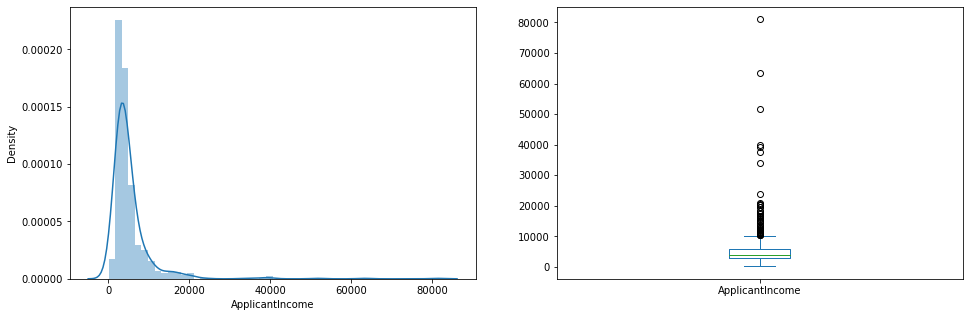

In [130]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(loan['ApplicantIncome']); 
plt.subplot(122) 
loan['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()


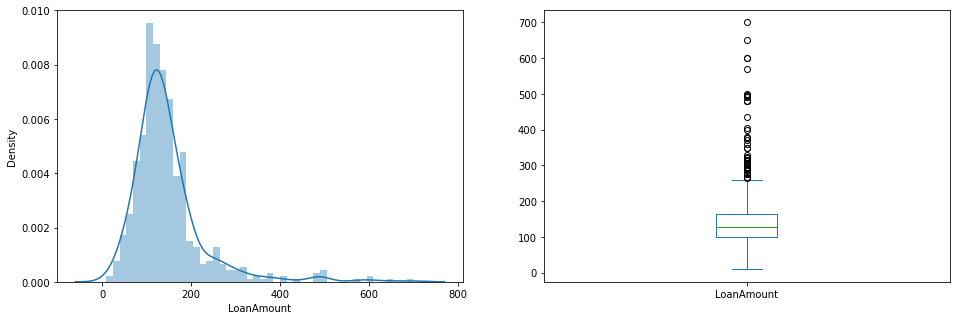

In [131]:
plt.figure(1) 
plt.subplot(121)
df= loan.dropna() 
sns.distplot(loan['LoanAmount']); 
plt.subplot(122)
loan['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

<AxesSubplot:xlabel='Gender'>

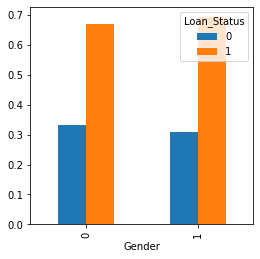

In [132]:
Gender=pd.crosstab(loan['Gender'],loan['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

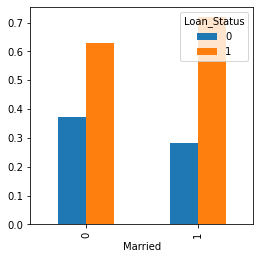

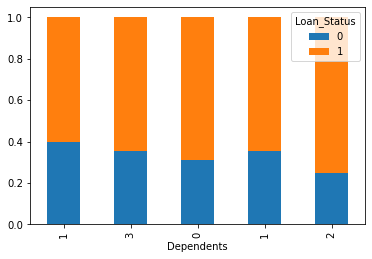

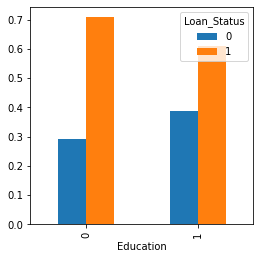

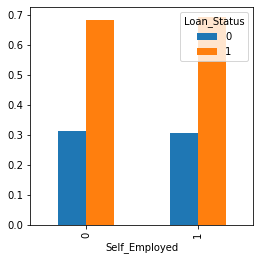

In [133]:
Married=pd.crosstab(loan['Married'],loan['Loan_Status']) 
Dependents=pd.crosstab(loan['Dependents'],loan['Loan_Status']) 
Education=pd.crosstab(loan['Education'],loan['Loan_Status']) 
Self_Employed=pd.crosstab(loan['Self_Employed'],loan['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.show()


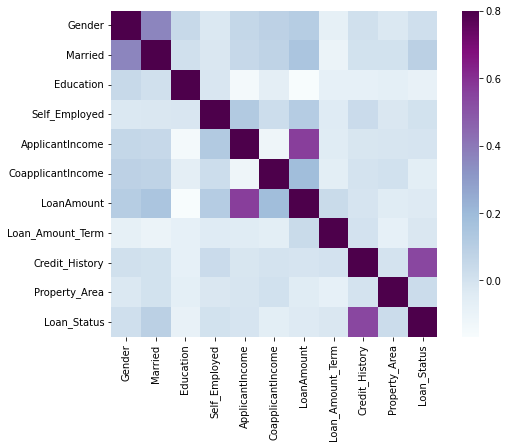

In [134]:
matrix =loan.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [135]:
loan.corr() 

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.045364,-0.023918,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.012304,-0.021584,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Education,0.045364,0.012304,1.000000,-0.019059,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.023918,-0.021584,-0.019059,1.000000,0.121356,0.028834,0.112118,-0.040244,0.035220,-0.022732,0.005857
ApplicantIncome,0.058809,0.051708,-0.140760,0.121356,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,-0.062290,0.028834,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,-0.166998,0.112118,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.077242,-0.040244,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.077936,0.035220,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483
Property_Area,-0.025752,0.004257,-0.065243,-0.022732,-0.009500,0.010522,-0.044776,-0.077620,-0.001880,1.000000,0.032112


<AxesSubplot:>

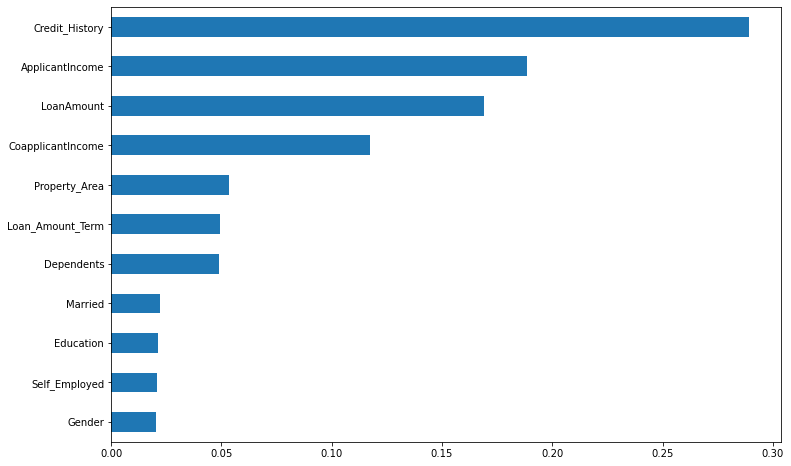

In [136]:

importances=pd.Series(model_a.feature_importances_, index=data.columns)
importances.sort_values(inplace=True) 
importances.plot(kind='barh', figsize=(12,8))


In [160]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(data,target): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = data.loc[train_index],data.loc[test_index] 
    ytr,yvl = target[train_index],target[test_index] 
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score) 
    i+=1 
pred_test = model.predict(test)


n1 of kfold 5


KeyError: "None of [Int64Index([  0,   1,   2,   4,   6,   8,   9,  10,  11,  13,\n            ...\n            602, 603, 604, 605, 606, 607, 608, 610, 611, 613],\n           dtype='int64', length=491)] are in the [columns]"

In [137]:
from sklearn.model_selection import GridSearchCV


In [138]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 
                    'n_estimators': list(range(1, 200, 20))}


In [139]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split

In [147]:
# Fit the grid search model 
grid_search.fit(data,target)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [157]:
GridSearchCV(cv=None, error_score='raise',       
        estimator=RandomForestClassifier(bootstrap=True, class_weight=None, 
                criterion='gini', max_depth=None, max_features='auto', 
                max_leaf_nodes=None, min_impurity_decrease=0.0, 
min_impurity_split=None,min_samples_leaf=1, min_samples_split=2, 
min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, 
random_state=1, verbose=0, warm_start=False),


n_jobs=1,       
param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
     'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},       

pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',scoring=None, verbose=0)





GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(n_estimators=10, n_jobs=1,
                                              random_state=1),
             n_jobs=1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]},
             return_train_score='warn')